# Munich Solcast - Model Development with pycaret AutoML
![1tI9Sw4[1].png](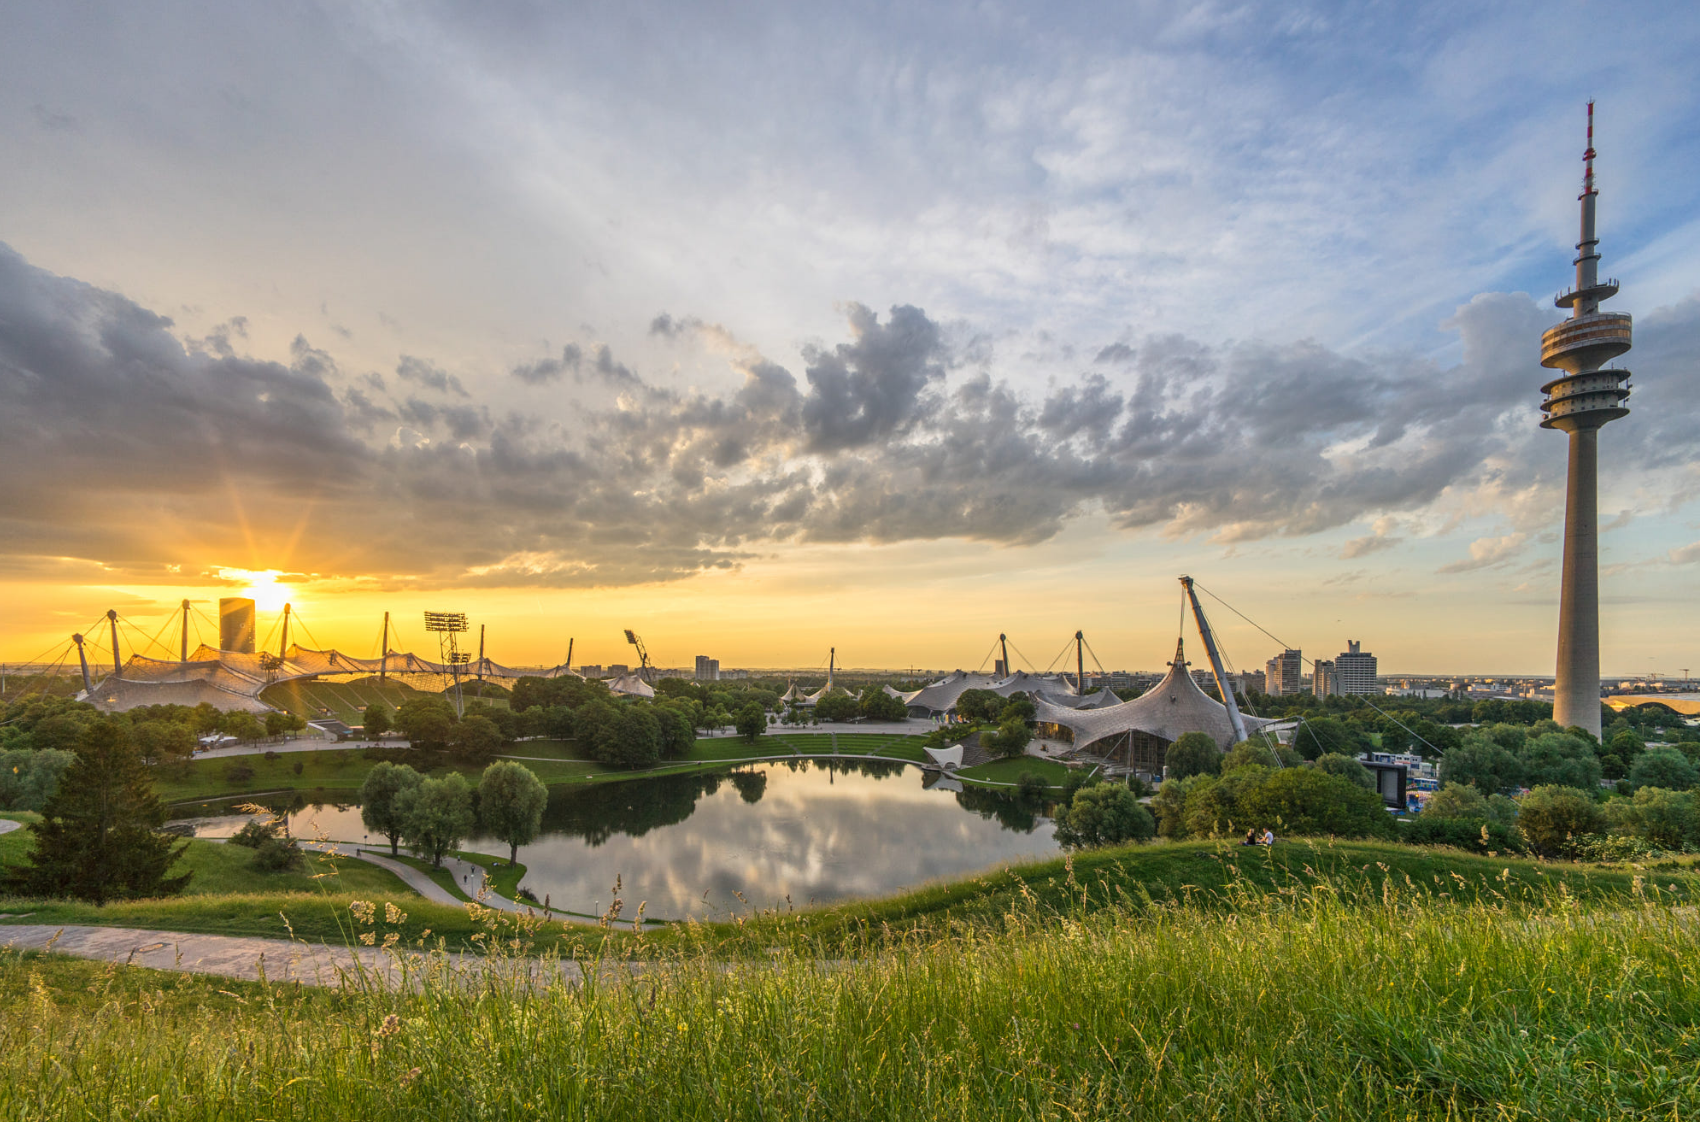)


In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
# read the dataframe
data_path = os.path.join(os.getcwd(),'data/Munich_Solcast_PT60M_clean.csv')
df = pd.read_csv(data_path)
df = df.drop(columns=['date'])    
df.shape

(1068, 11)

In [3]:
data = df.sample(frac=0.8, random_state=42)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data for Predictions: ' + str(data_unseen.shape))

Data for Modeling: (854, 11)
Unseen Data for Predictions: (214, 11)


## AutoML training and testing w/ pycaret
for reference see [here](https://pycaret.org/)

In [4]:
! pip install pycaret

In [5]:
from pycaret.regression import *
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


### Initialization

In [6]:
# initialize the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.
regression = setup(data = data, target = 'Radiation', session_id=123) 

Description             Value
0                               session_id               123
1                                   Target         Radiation
2                            Original Data         (854, 11)
3                           Missing Values             False
4                         Numeric Features                 9
5                     Categorical Features                 1
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set         (597, 21)
10                    Transformed Test Set         (257, 21)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              a367
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

### Compare all models

In [7]:
#  trains all models in the model library and score them using 10-fold cross validation (default)
best_model = compare_models(exclude = ['ransac'], sort = 'R2', fold = 10)

Model         MAE           MSE  \
et                  Extra Trees Regressor     10.5284  2.465139e+02   
lightgbm  Light Gradient Boosting Machine     14.1760  4.869306e+02   
gbr           Gradient Boosting Regressor     14.3366  4.868660e+02   
rf                Random Forest Regressor     14.3447  5.320008e+02   
lr                      Linear Regression     23.3515  8.536286e+02   
ridge                    Ridge Regression     23.3174  8.554740e+02   
br                         Bayesian Ridge     23.4248  8.680873e+02   
lasso                    Lasso Regression     25.3287  1.008200e+03   
en                            Elastic Net     25.5610  1.033859e+03   
knn                 K Neighbors Regressor     21.8863  1.011222e+03   
huber                     Huber Regressor     25.3468  1.108805e+03   
dt                Decision Tree Regressor     21.0033  1.115675e+03   
ada                    AdaBoost Regressor     30.8030  1.322159e+03   
omp           Orthogonal Matching Pursuit     30.2835  1.723257e+03   
par          Passive Aggressive Regressor     36.3798  2.332100e+03   
llar         Lasso Least Angle Regression     44.4928  2.826410e+03   
dummy                     Dummy Regressor    115.6254  1.776718e+04   
lar                Least Angle Regression  39213.2732  7.175270e+09   

                RMSE           R2   RMSLE      MAPE  TT (Sec)  
et           15.5807       0.9854  0.0580    0.0413     0.506  
lightgbm     21.8341       0.9718  0.0810    0.0577     0.097  
gbr          21.9807       0.9714  0.0871    0.0618     0.142  
rf           22.7679       0.9689  0.0847    0.0575     0.588  
lr           29.1830       0.9500  0.2341    0.1424     0.276  
ridge        29.2103       0.9500  0.2286    0.1403     0.013  
br           29.4157       0.9494  0.2324    0.1390     0.016  
lasso        31.6086       0.9420  0.2542    0.1417     0.014  
en           32.0116       0.9404  0.2724    0.1426     0.015  
knn          31.5114       0.9395  0.1251    0.0967     0.060  
huber        33.1584       0.9357  0.2268    0.1345     0.046  
dt           32.9319       0.9344  0.1222    0.0838     0.020  
ada          36.3005       0.9227  0.2143    0.1874     0.112  
omp          41.2853       0.9005  0.2843    0.1572     0.013  
par          47.1822       0.8661  0.2956    0.1923     0.014  
llar         52.9623       0.8360  0.2799    0.2561     0.013  
dummy       132.9102      -0.0205  0.6467    0.7607     0.011  
lar       47110.8238 -382873.6255  2.7593  257.9877     0.016

In [8]:
extra_boost = create_model('et', fold=10)

MAE       MSE     RMSE      R2   RMSLE    MAPE
0      8.3716  132.4493  11.5087  0.9922  0.0480  0.0394
1     11.4516  251.0460  15.8444  0.9862  0.0655  0.0494
2      9.3651  165.1123  12.8496  0.9909  0.0420  0.0343
3     11.5832  300.7746  17.3429  0.9843  0.0589  0.0405
4     11.6637  275.0789  16.5855  0.9782  0.0641  0.0469
5      9.2900  200.3509  14.1545  0.9900  0.0580  0.0383
6     11.4900  278.5958  16.6912  0.9817  0.0680  0.0470
7     10.4402  300.8672  17.3455  0.9807  0.0635  0.0404
8     10.2142  268.2196  16.3774  0.9838  0.0573  0.0388
9     11.4145  292.6447  17.1069  0.9863  0.0551  0.0379
Mean  10.5284  246.5139  15.5807  0.9854  0.0580  0.0413
SD     1.1229   56.6846   1.9383  0.0044  0.0077  0.0046

In [9]:
# tune model with random grid search
tuned_extra_boost = tune_model(extra_boost, optimize = 'R2')

MAE       MSE     RMSE      R2   RMSLE    MAPE
0     14.8422  383.6486  19.5869  0.9773  0.1065  0.0820
1     18.0732  608.3885  24.6655  0.9666  0.1079  0.0823
2     13.8581  385.3187  19.6295  0.9788  0.0635  0.0508
3     15.7579  504.2064  22.4545  0.9736  0.0844  0.0638
4     16.5280  658.1188  25.6538  0.9477  0.1142  0.0760
5     17.4765  608.0461  24.6586  0.9698  0.1249  0.0844
6     14.7225  493.7459  22.2204  0.9676  0.1083  0.0722
7     12.2552  334.7549  18.2963  0.9786  0.0672  0.0500
8     15.5261  621.7513  24.9349  0.9625  0.0946  0.0649
9     14.5991  478.7090  21.8794  0.9776  0.0712  0.0508
Mean  15.3639  507.6688  22.3980  0.9700  0.0943  0.0677
SD     1.6291  108.2425   2.4491  0.0092  0.0204  0.0130

In [10]:
print(tuned_extra_boost)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


### Plot Results

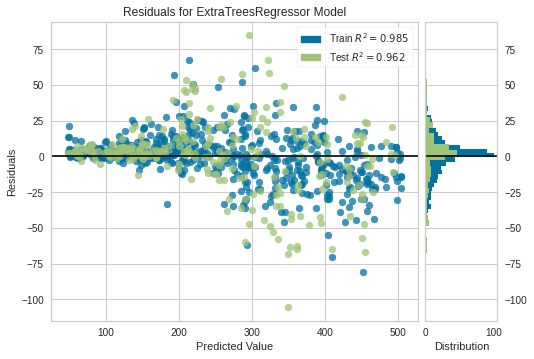

In [11]:
plot_model(tuned_extra_boost)

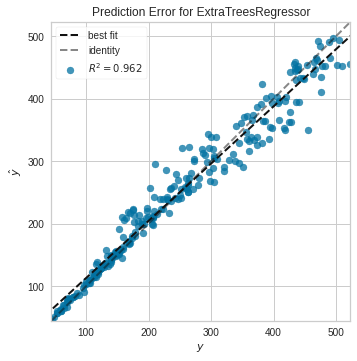

In [12]:
plot_model(tuned_extra_boost, plot='error')

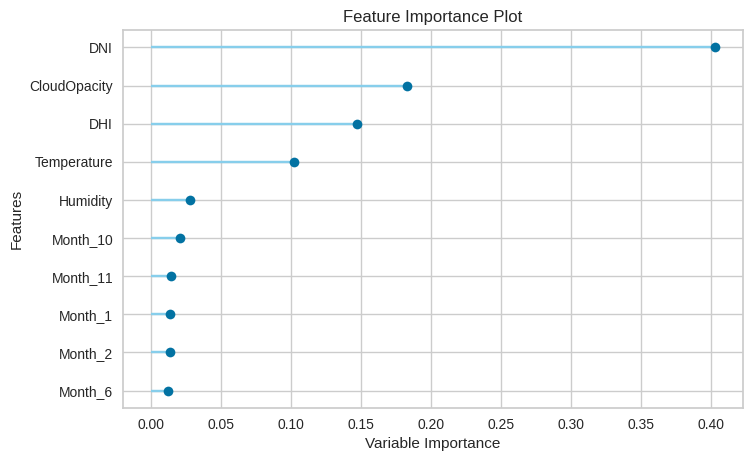

In [13]:
plot_model(extra_boost, 'feature')

In [14]:
evaluate_model(tuned_extra_boost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Prediction on unseen data (Validation)

In [15]:
# Predict on Test / Hold-out Sample
predict_model(tuned_extra_boost);

Model      MAE       MSE     RMSE      R2   RMSLE    MAPE
0  Extra Trees Regressor  17.1634  631.7869  25.1354  0.9622  0.0914  0.0694

In [16]:
# Finalize Model for Deployment, i.e. fits the model onto the complete dataset including the test/hold-out samples
final_extra_boost = finalize_model(tuned_extra_boost)

In [17]:
print(final_extra_boost)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


In [18]:
pred = predict_model(final_extra_boost, data=data_unseen)
pred.head()

Temperature  CloudOpacity         DHI  ...  WindSpeed  Month       Label
0     2.422222     64.444444   56.000000  ...   5.244444      1   57.142464
1    -3.177778     74.866667   46.000000  ...   3.744444      1   48.099538
2     1.277778     74.311111   61.000000  ...   7.811111      1   60.637132
3     0.622222     67.377778   69.666667  ...   7.177778      1   68.180381
4    -4.777778     42.844444  105.555556  ...   1.155556      1  124.166203

[5 rows x 12 columns]

In [19]:
from pycaret.utils import check_metric
check_metric(pred.Radiation, pred.Label, 'R2')

0.9869

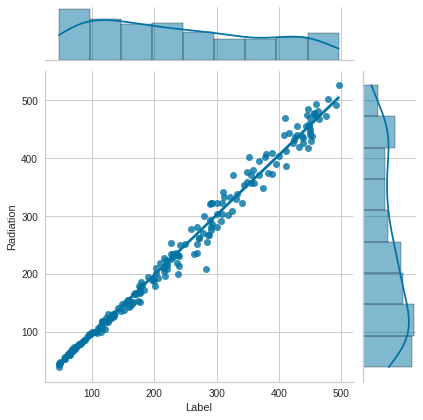

In [20]:
sns.jointplot(pred.Label, pred.Radiation, kind = 'reg');